Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

NAME = "Letícia da Silva Macedo Alves"
COLLABORATORS = ""

---

# Lista 07 - Gradiente Descendente e Regressão Multivariada

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from numpy.testing import *

plt.ion()

Hoje vamos fazer um gradiente descendente para uma regressão linear com múltiplas variáveis.

Para isso, utilizaremos a base de dados carros, ``hybrid.csv``. As colunas são definidas da seguinte forma:

* veículo (vehicle): modelo do carro

* ano (year): ano de fabricação

* msrp: preço de varejo em dólar sugerido pelo fabricante em 2013.

* aceleração (acceleration): taxa de aceleração em km por hora por segundo

* mpg: economia de combustível em milhas por galão

* classe (class): a classe do modelo.

Nosso objetivo será estimar o valor de preço sugerido dos carros a partir dos demais atributos (exluindo o nome do veículo e a classe).
Portanto, teremos a regressão definida pela fórmula:

$$ Y = X\Theta + \epsilon $$

Em que, Y corresponde à coluna ``msrp`` dos dados, e X corresponde às colunas ``year,acceleration,mpg``.

In [2]:
df = pd.read_csv('./hybrid.csv')
df.head()

,vehicle,year,msrp,acceleration,mpg,class
0,Prius (1st Gen),1997,24509.74,7.46,41.26,Compact
1,Tino,2000,35354.97,8.20,54.10,Compact
2,Prius (2nd Gen),2000,26832.25,7.97,45.23,Compact
3,Insight,2000,18936.41,9.52,53.00,Two Seater
4,Civic (1st Gen),2001,25833.38,7.04,47.04,Compact


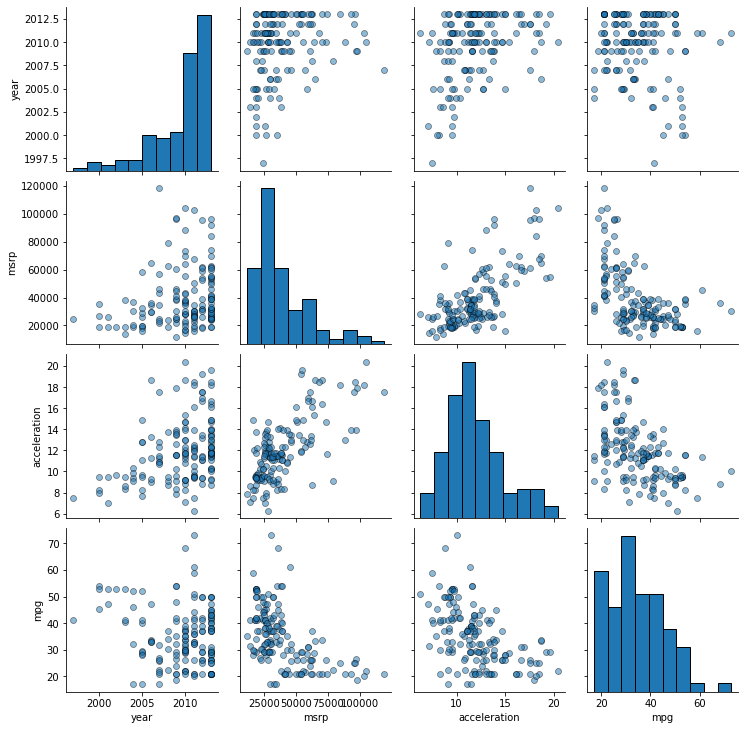

In [3]:
import seaborn as sns
sns.pairplot(df, diag_kws={'edgecolor':'k'}, plot_kws={'alpha':0.5, 'edgecolor':'k'})

Selecionamos apenas as colunas que serão utilizadas.

Normalizamos os dados para que o gradiente descendente rode sem problemas.

In [4]:
y = df['msrp']
X = df[['year','acceleration','mpg']]

X -= X.mean()
X /= X.std(ddof=1)
y -= y.mean()
y /= y.std(ddof=1)


# Acrescentamos uma coluna 0 correspondente ao intercepto (valor de y quando X=0)
X.insert(0, 'intercept', 1.0)

X = X.values
y = y.values


__IMPORTANTE:__
Não crie ou utilize qualquer variável ou função com nome iniciado por ``_teste_``.

A) Implemente a função de gradiente dos parâmetros da regressão, retornando um array com os valores dos gradientes para cada parâmetro theta.

In [5]:
def gradients(theta, X, y):
    # x : matriz nxm
    # y : array nx1
    # theta : array mx1
    # YOUR CODE HERE
    return -2*((y-X@theta)*X.T).mean(axis=1)

B) Implemente a função de gradiente descendente para os parâmetros da regressão linear. 

Retorne uma lista com o valor de alpha e os valores de beta para cada coluna, nessa ordem.

In [6]:
def descent(theta0, X, y, learning_rate=0.005, tolerance=0.0000001):
    # YOUR CODE HERE
    
    thetas = theta0.copy()
    erro_antigo = np.inf
    
    for i in range (1000):
        grad = gradients(thetas, X, y)
        theta_novo = thetas - learning_rate*grad
        
        erro_quad = ((X.dot(thetas) - y) ** 2).mean()
        
        if (np.abs(erro_antigo - erro_quad) <= tolerance):
            break
        thetas = theta_novo
        erro_antigo = erro_quad
        
    return thetas

C) Agora vamos tentar avaliar o modelo de regressão linear obtido com o gradiente descendente.

Primeiro implementem uma função que calcule o valor da soma total dos quadrados (SST) a partir dos dados.

In [7]:
def sst(y):
    # YOUR CODE HERE
    return ((y-np.mean(y))**2).sum()

D) Para calcular a soma total de erros (SSE), primeiro precisamos ter uma previsão para os valores de
 preço dos apartamentos.
Implementem uma função que obtenha os valores estimativa de preço a partir dos demais atributos, de acordo com o modelo de regressão linear.

A função deve retornar uma lista com os valores previstos.

In [8]:
def predict(X, theta):
    # YOUR CODE HERE
    return X@theta

E) Agora implemente a função de cálculo da soma total de erros (SSE).

In [9]:
def sse(X, y, theta):
    # YOUR CODE HERE
    previsoes = predict(X, theta)

    return ((y-previsoes)**2).sum()

F) Finalmente, implemente a função que calcula o coeficiente de determinação (R2).

In [10]:
def r2(X, y, theta):
    # YOUR CODE HERE
    sst_i = sst(y)
    sse_i = sse(X, y, theta)
    
    r_quad = 1 - (sse_i/sst_i)
    
    return r_quad

In [11]:
print("R2 dados originais: ", r2(X,y,descent([1,1,1,1], X, y)))

R2 dados originais:  0.528864811824564


G) Se observarmos os dados pelos gráficos gerados no começo do notebook, podemos perceber que nem todos possuem uma relação linear. Vamos tentar transformar os dados de um dos atributos dos carros, para que uma regressão linear possa ser aplicada com melhores resultados.

Tire o logaritmo dos dados do atributo ```mpg```, antes de z-normalizar.

In [12]:
y = df['msrp']
X = df[['year','acceleration','mpg']]

# YOUR CODE HERE
mpg_log = np.log(X['mpg'])
del X['mpg']
X.insert(2, "mpg_log", mpg_log, allow_duplicates = True)

X -= X.mean()
X /= X.std(ddof=1)
y -= y.mean()
y /= y.std(ddof=1)

X.insert(0, 'intercept', 1.0)

X = X.values
y = y.values

print("R2 dados com log(mpg): ", r2(X,y,descent([1,1,1,1], X, y)))

R2 dados com log(mpg):  0.5543445557222668


Note que o código do gradiente descendente pode ser executado sem alterações.

Verifique se o R2 da regressão melhorou ou piorou ao se transformar os dados.

RESPOSTA: 
Podemos verificar que o R2 da regressão melhorou de, aproximadamente, 0.528 para 0.554 após a transformação dos dados realizada.